## Bike Sharing Assignment

In [160]:
# import depended libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

### 1. Data Reading & Understanding

In [161]:
# Loading the loan data and converting into dataframe
df=pd.read_csv("day.csv")

In [162]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [163]:
df.shape

(730, 16)

In [164]:
# To check if there is any headers/footers or summary details rows are there and delete it.

In [165]:
df.head() # summay about the loan Data
print(df.shape)
df.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [166]:
df.tail() # checking if totaol, subtotoal rows present

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [167]:
# From above analysis We can see that there is no header/footers/summary/subtotal rows
# Also number of rows is 730 and columns is 16.


In [168]:
# To check if there is any null values.

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [170]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [171]:
# We can see that there is no null values present in data.


In [172]:
# Here data looks with in the permissiable ranage.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [173]:
#Delete  Unnessasry columns:

In [174]:
# 1. From above analysis we can see that the columns instant is unique in nature and act like a id which will not participate
#in analysis. Hence we can drop them.
# we can also see that only dtedat is of object type while others attribute is of int/float type.
# Since we already having month and year so we can drop dteday columns.


In [175]:
print("Total columns with values NA: ", len(df.columns[df.isna().all()].tolist()))


Total columns with values NA:  0


In [176]:
 #Lets delete all the columns which value is uniqe in nature.

unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]
unique_columns

['instant', 'dteday']

In [177]:
dropped_columns=['instant','dteday']
df.drop(dropped_columns,axis=1,inplace=True)
df.shape


(730, 14)

In [178]:
# Checking  if there any duplicates row. 

In [179]:
duplicate_rows = len(df[df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))

Count of duplicate rows: 0


In [180]:
# No duplicaets rows found.


In [181]:
# so there is no any more columns with uniqe values.

In [182]:
# Inferences:
# We can see that values are in with the ranges. So need to remove any outliers.

In [183]:
# Transforming the Data

In [184]:
# Form data dictionary and abvoe analysis we can say that  season, weathersit & month are catogorical values but found as int.
#Lets Convert season, weathersit & month to Catogory type
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(7)
memory usage: 65.7 KB


In [185]:
# As per data dictionary, following are the categorical variables has following values.
# 1. yr has two values 0 for 2018 and 1 for 2019.
# 2. holiday o or 1.
# 3. working day 0 or 1.
# 4. weathersit has three values good, bad and moderate weatherSit. 
# 5. season (1:spring, 2:summer, 3:fall, 4:winter)
# all the data seems to be in range

In [186]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2. EDA

#### Univariate analysis

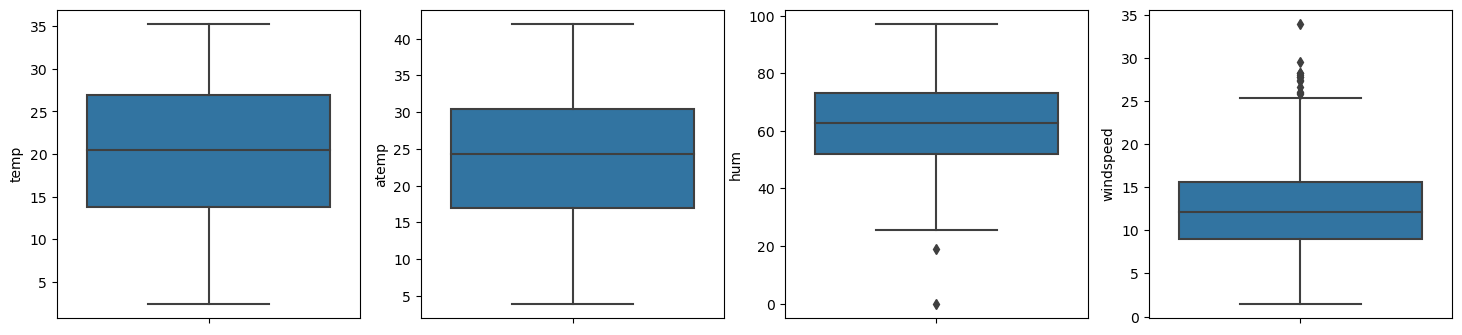

In [187]:
# Lets check if any outliers present is numeric featires.
# raw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

k = 1
for col in cols:
    plt.subplot(1,4,k)
    sns.boxplot(y=col, data=df)
    k+=1

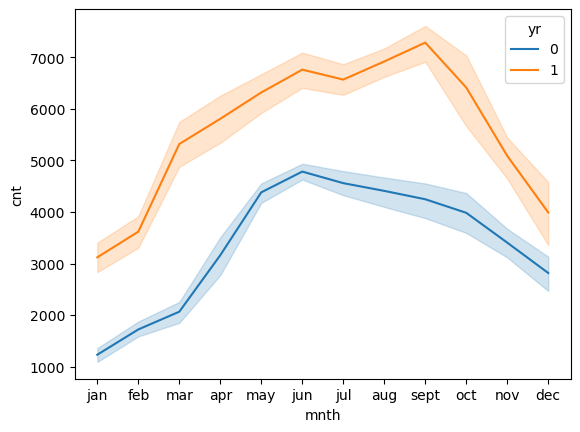

In [188]:
# Line graph will that show the count vs month for year 2018 and 2019.
sns.lineplot(x = "mnth", y = "cnt", data=df,hue = "yr")
plt.show() 

In [189]:
# Inferences:
# 1. From Line Graph we can see that target Variable cnt has increased from 2018 to 2019.
# 2. Demand for bike is high between may to oct for year 2018 and 2019.
# 3. From Boxchart we can also see that there is no outliers present.

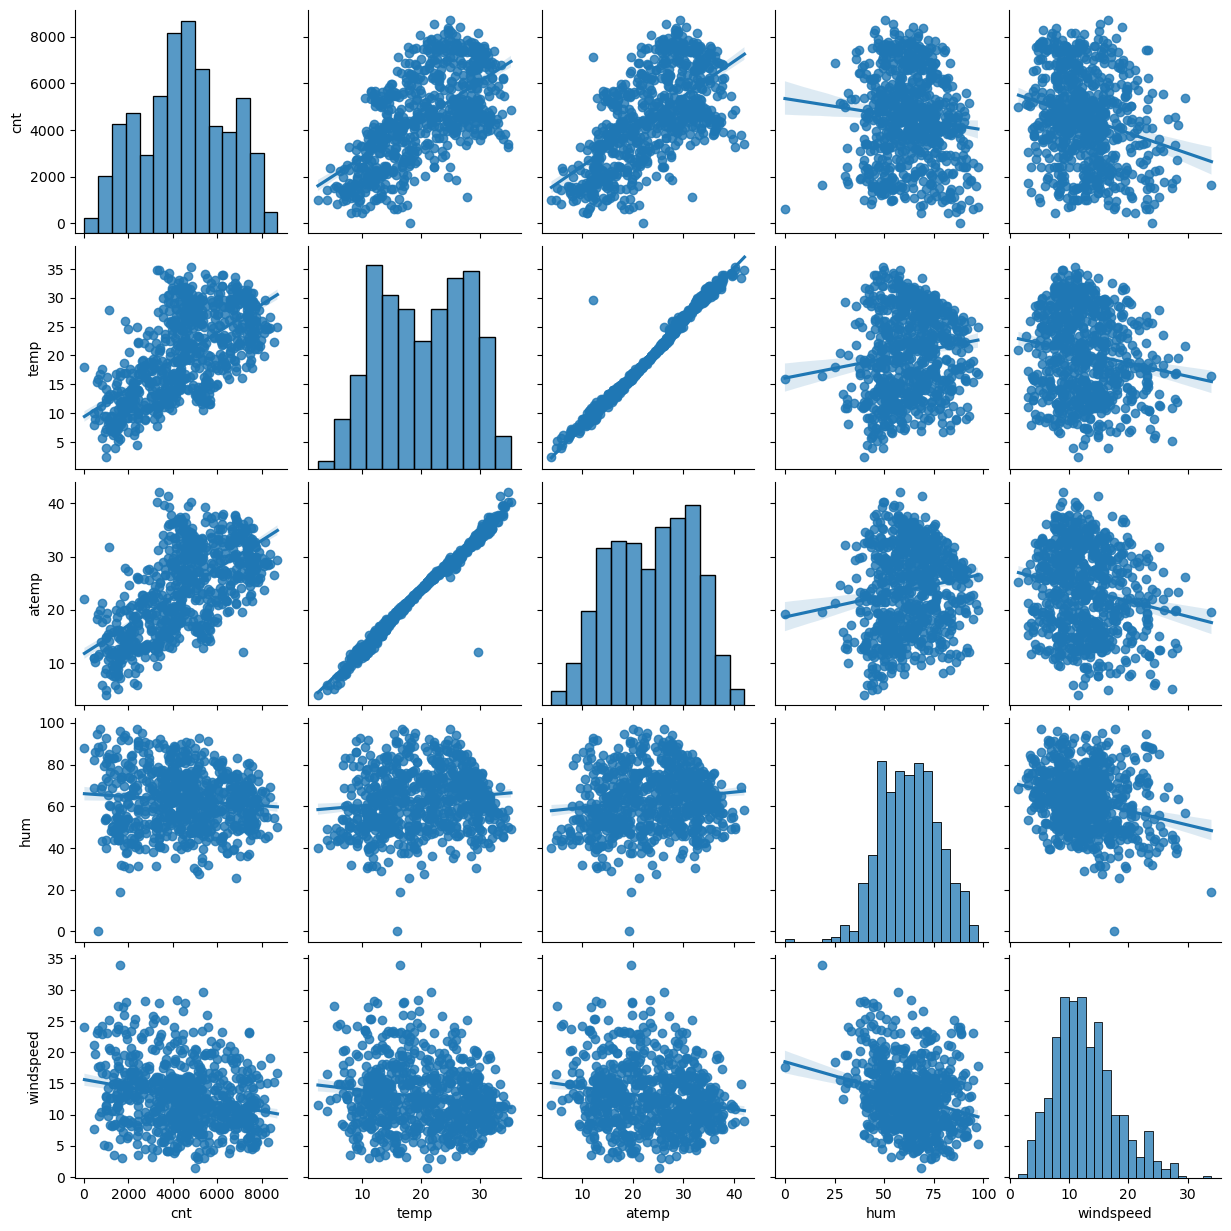

In [190]:
# Lets plot pairplots to have better to see if cnt is linearly  depend upon is independet variables. 
numerical_variabels=['cnt', 'temp', 'atemp', 'hum','windspeed']
sns.pairplot(data=df,vars=numerical_variabels, kind="reg")
plt.show()

In [191]:
# Inferences:
# 1. We can see that we have linealy dependecy between temp, atemp and count.
# 2. we can also see that temp and atemp is highly correlated.

####  Bivariate analysis

In [192]:
#  Barcharts for categorical variables to see demands

In [193]:
# function to create barplot related to categorical columns

def plot_bar_graphs(column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=df)
    plt.title(f'Bar Plot of {column} vs cnt')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=df, hue='yr', palette='Set1')
    plt.title(f'Bar Plot of {column} vs cnt (2018 vs 2019)')
    plt.legend(title='yr', labels=['2018', '2019'])
    
    plt.tight_layout()
    plt.show()

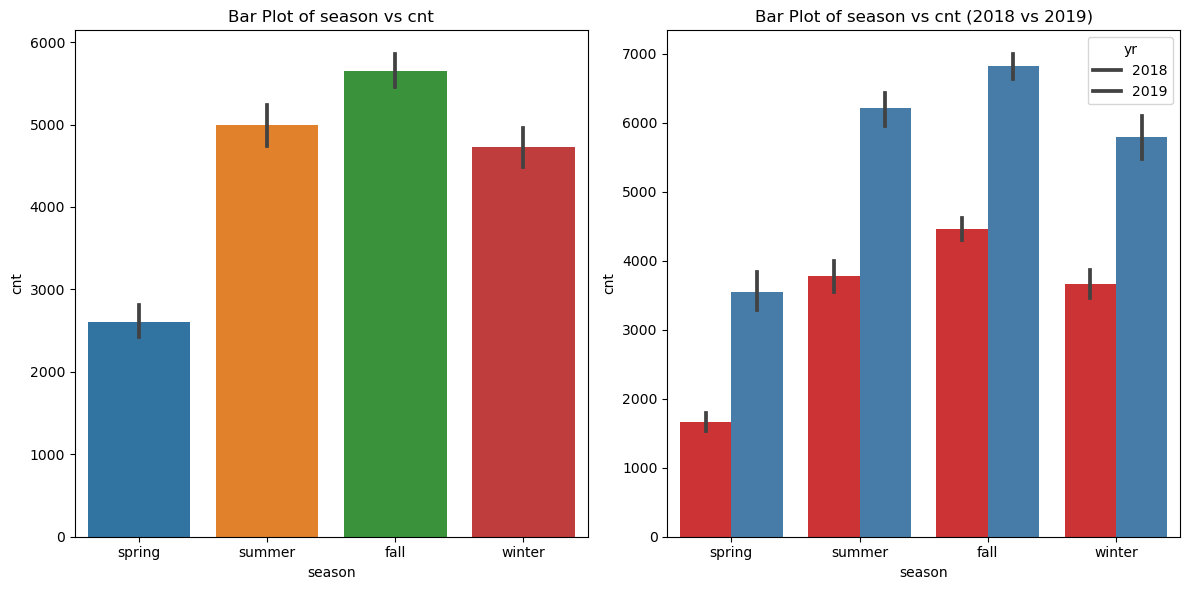

In [194]:
plot_bar_graphs('season')

In [195]:
# Inferences:
# 1. Fall  seasons is having high number bike rental.
# 2. Bike rental in 2019 has increaded for every seasion compared to 2018.

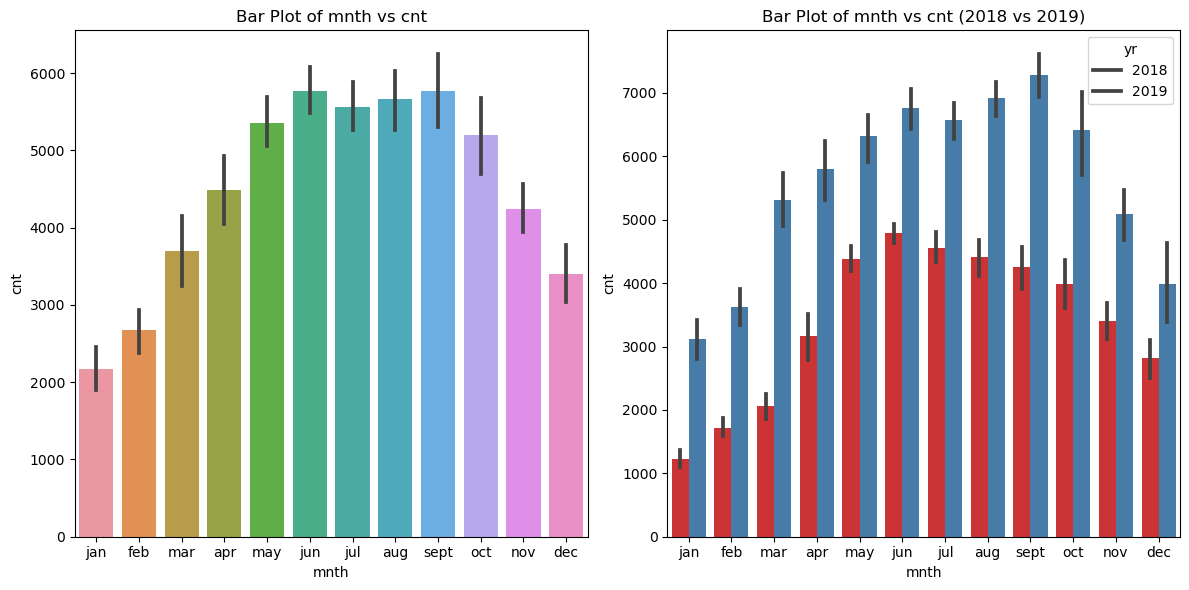

In [196]:
plot_bar_graphs('mnth')

In [197]:
# Inferences:
# 1. May to oct is having number of bike registration.
# 2. Bike registration in 2019 has increaded for every month compared to 2018.

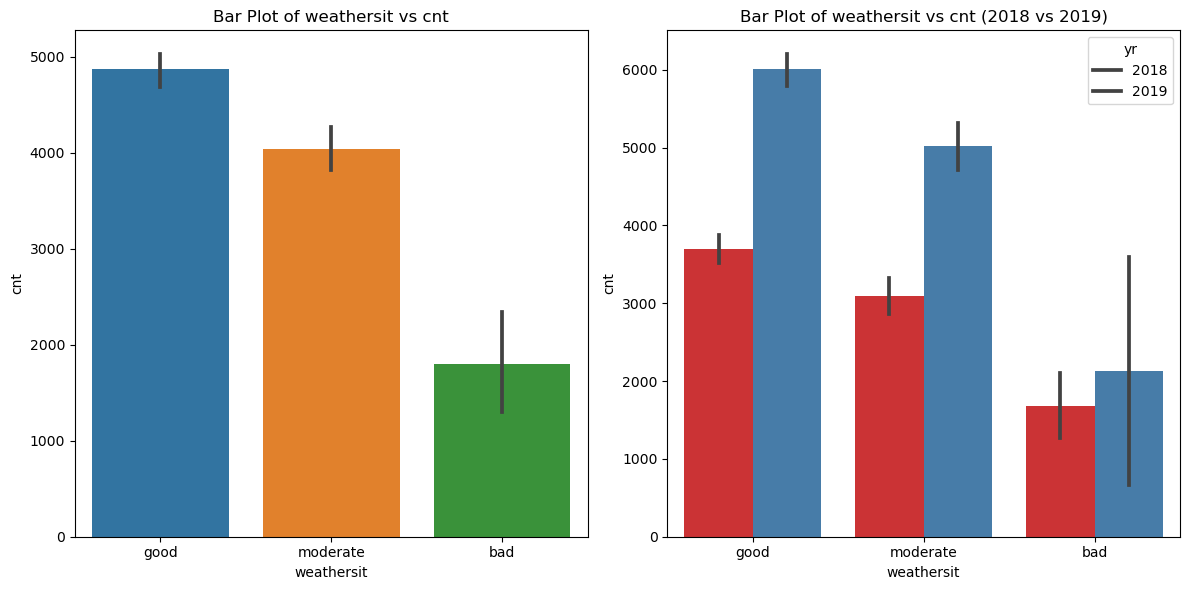

In [198]:
plot_bar_graphs('weathersit')

In [199]:
# Inferences:
# 1. People prefer bike rental when weather situations is good. 
# 2. Bike registration in 2019 has increaded  for every weather situtation 2018.

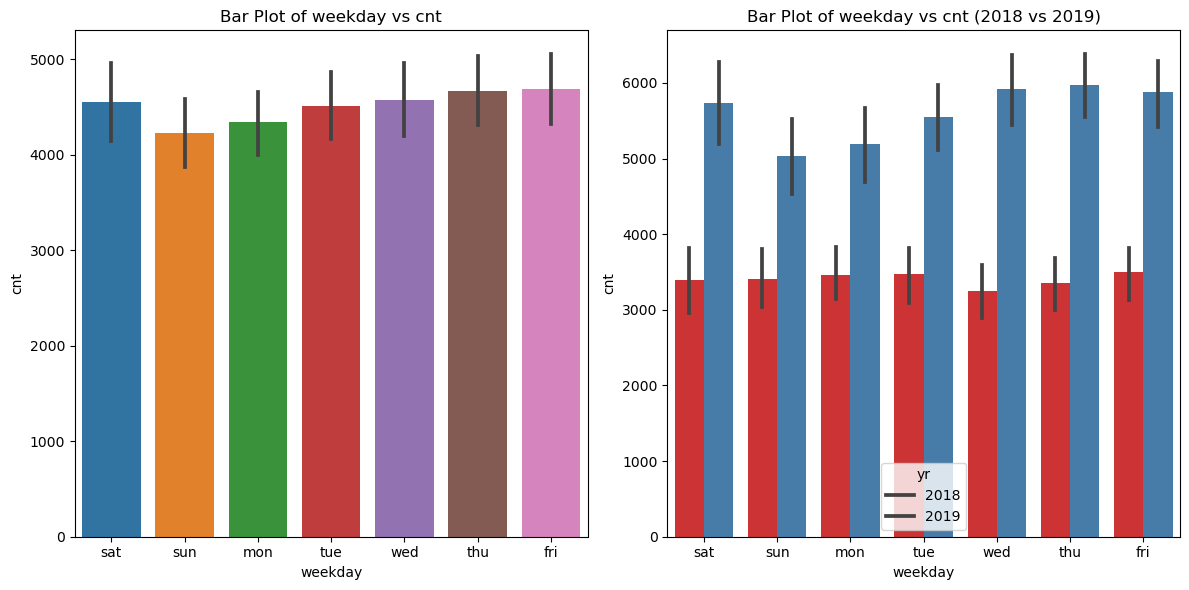

In [200]:
plot_bar_graphs('weekday')

In [201]:
# Inferences:
# 1. People don't prefer bike rental on weekends. 


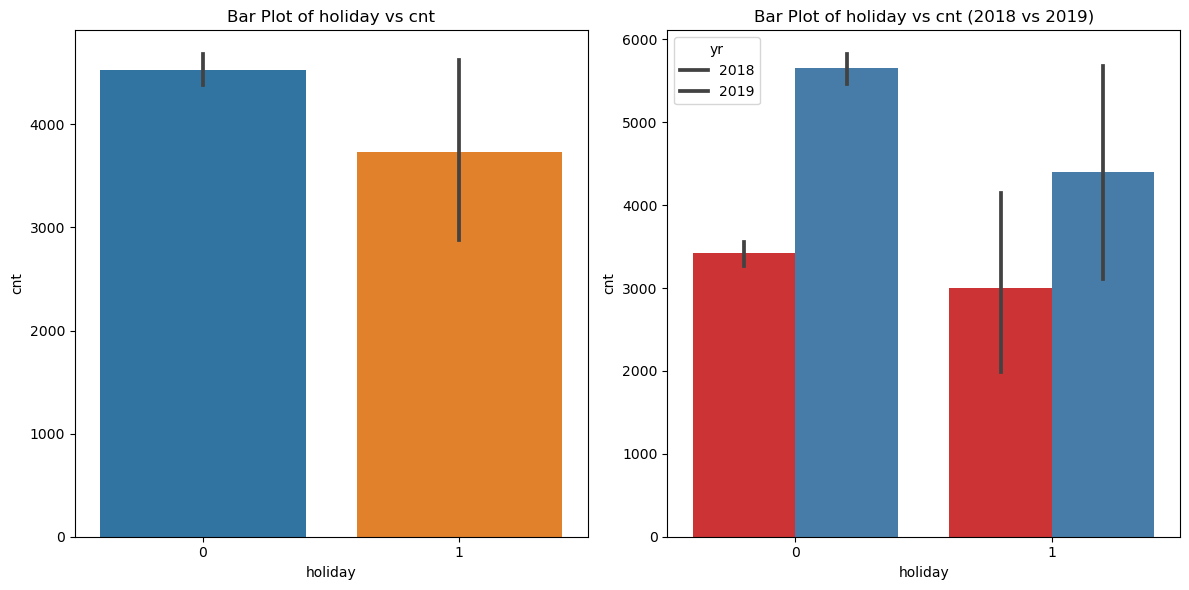

In [202]:
plot_bar_graphs('holiday')


In [203]:
# Inferences:
# 1. People dont prefer renting bike holiday.

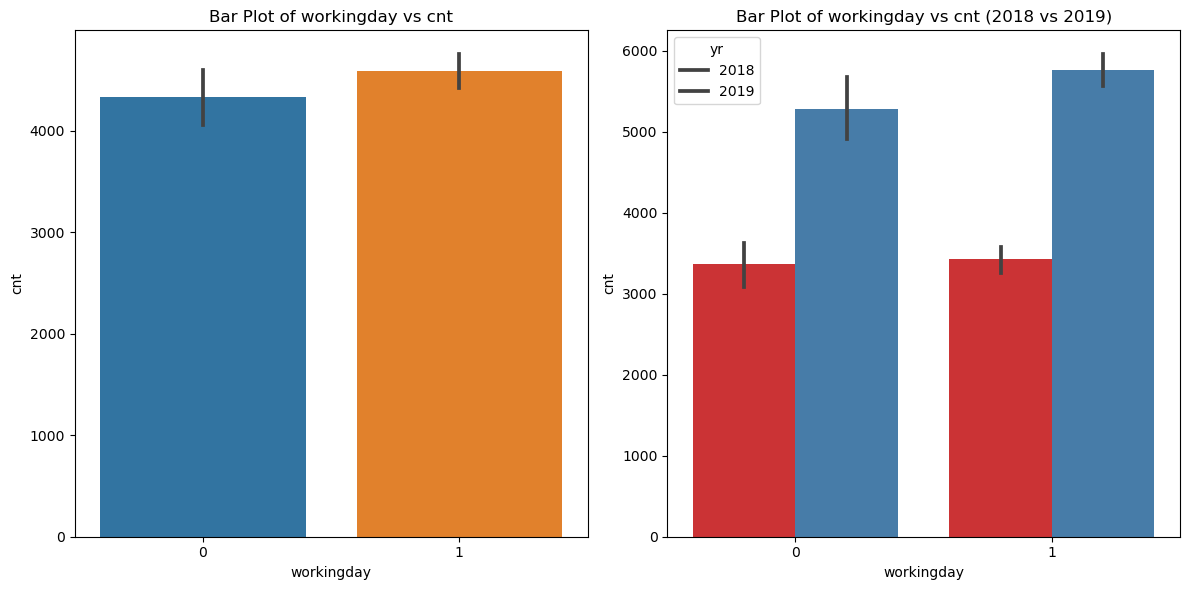

In [204]:
plot_bar_graphs('workingday')

In [205]:
# Inferences:
# 1. People prefer bike rental on working days.

In [206]:
# Lets draw heatMap to indentify is there any correlation.


In [207]:
numeric_df = df.select_dtypes(include=['number'])

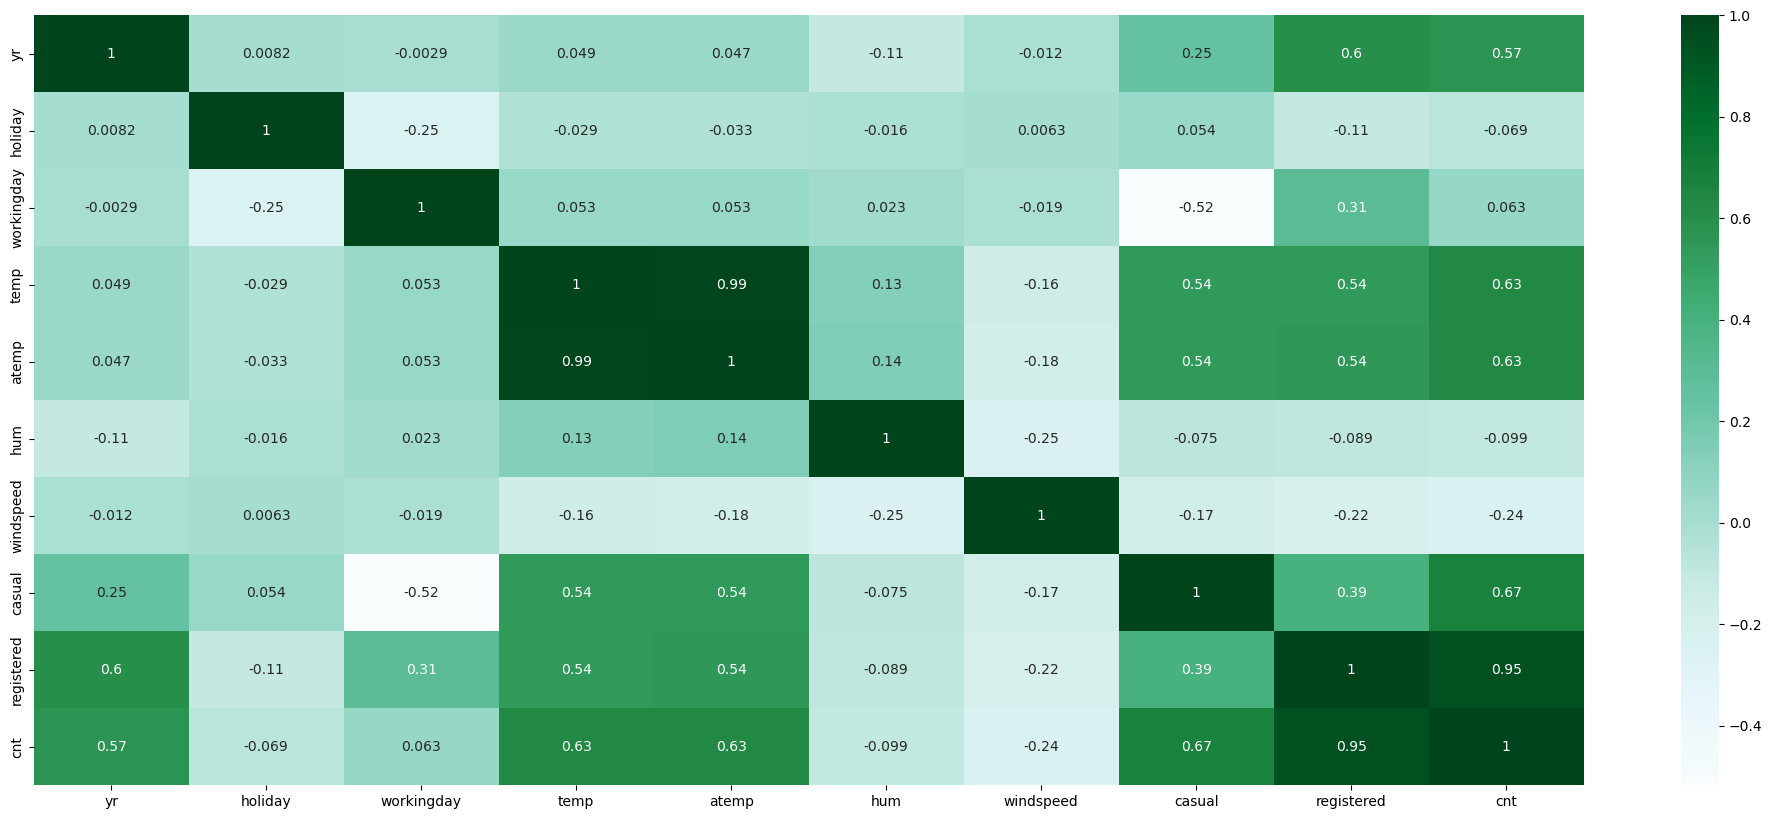

In [208]:
# Lets plot the corrlation matrix(heatmap)
plt.figure(figsize=(25, 10))
sns.heatmap(numeric_df.corr(), cmap='BuGn', annot=True)
plt.show()

In [209]:
#Inferences from heatmap: 
#1. Since Count is sum of casual and registed. That we can infer from  heatmap as casual and registered are highly correleted with cnt. 
#2. holiday, hum, and windspeed is negatively correlated. 
#3. Indepedent variable temp and atemp is highly correlated(0.99).This show that there is high possiblity that one may have derived from another,One of the them can be dropped. Will use VIP and p values to drop this.

In [210]:
df.shape

(730, 14)

In [211]:
# Dropping casual and Registed as  they sumed to Cnt.

df.drop(['casual','registered'],axis=1,inplace=True)

In [212]:

df.shape

(730, 12)

## 3. Data Preparation

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(4), object(1)
memory usage: 54.3+ KB


#### Creating dummy variables for catogorical variables.

In [214]:
# we need to create a dummy variables for four categorical variables. mnth', 'weekday', 'season' & 'weathersit

In [228]:
df = pd.get_dummies(df, drop_first=True)

In [229]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,False,False,False,True,False,False


In [230]:
# Divide the train and test data
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.75, test_size=0.25, random_state=100)

In [231]:
df_train.shape

(547, 30)

In [219]:
df_test.shape

(183, 30)

#### Scaling numeric variables 

In [243]:
#scaling numeric variables of traning data using MinMaxScalor between 0-1.
num_vars =  ['temp', 'atemp', 'hum', 'windspeed','cnt']
scaler=MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

KeyError: "['cnt'] not in index"

In [233]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,False,False,...,True,False,False,False,False,False,True,False,False,False
523,1,0,1,0.735215,0.680985,0.482181,0.286093,0.887483,True,False,...,False,False,False,False,False,False,False,False,False,False
381,1,0,1,0.391151,0.374375,0.737917,0.659615,0.335136,False,False,...,False,False,False,False,False,False,True,False,True,False
413,1,0,0,0.358285,0.362754,0.550880,0.319514,0.494248,False,False,...,False,False,False,True,False,False,False,False,False,False
253,0,0,0,0.740406,0.695906,0.735509,0.156398,0.578003,False,True,...,False,False,False,False,True,False,False,False,False,False


In [242]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.669104,0.535543,0.511400,0.650673,0.319317
std,0.500390,0.163460,0.470966,0.225446,0.211788,0.144515,0.169239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336998,0.326287,0.538858,0.197844
50%,1.000000,0.000000,1.000000,0.535847,0.521862,0.655216,0.294101
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.753113,0.413761
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [223]:
# From above analysis we can see that numeric variabels has scaled between 0 and 1.


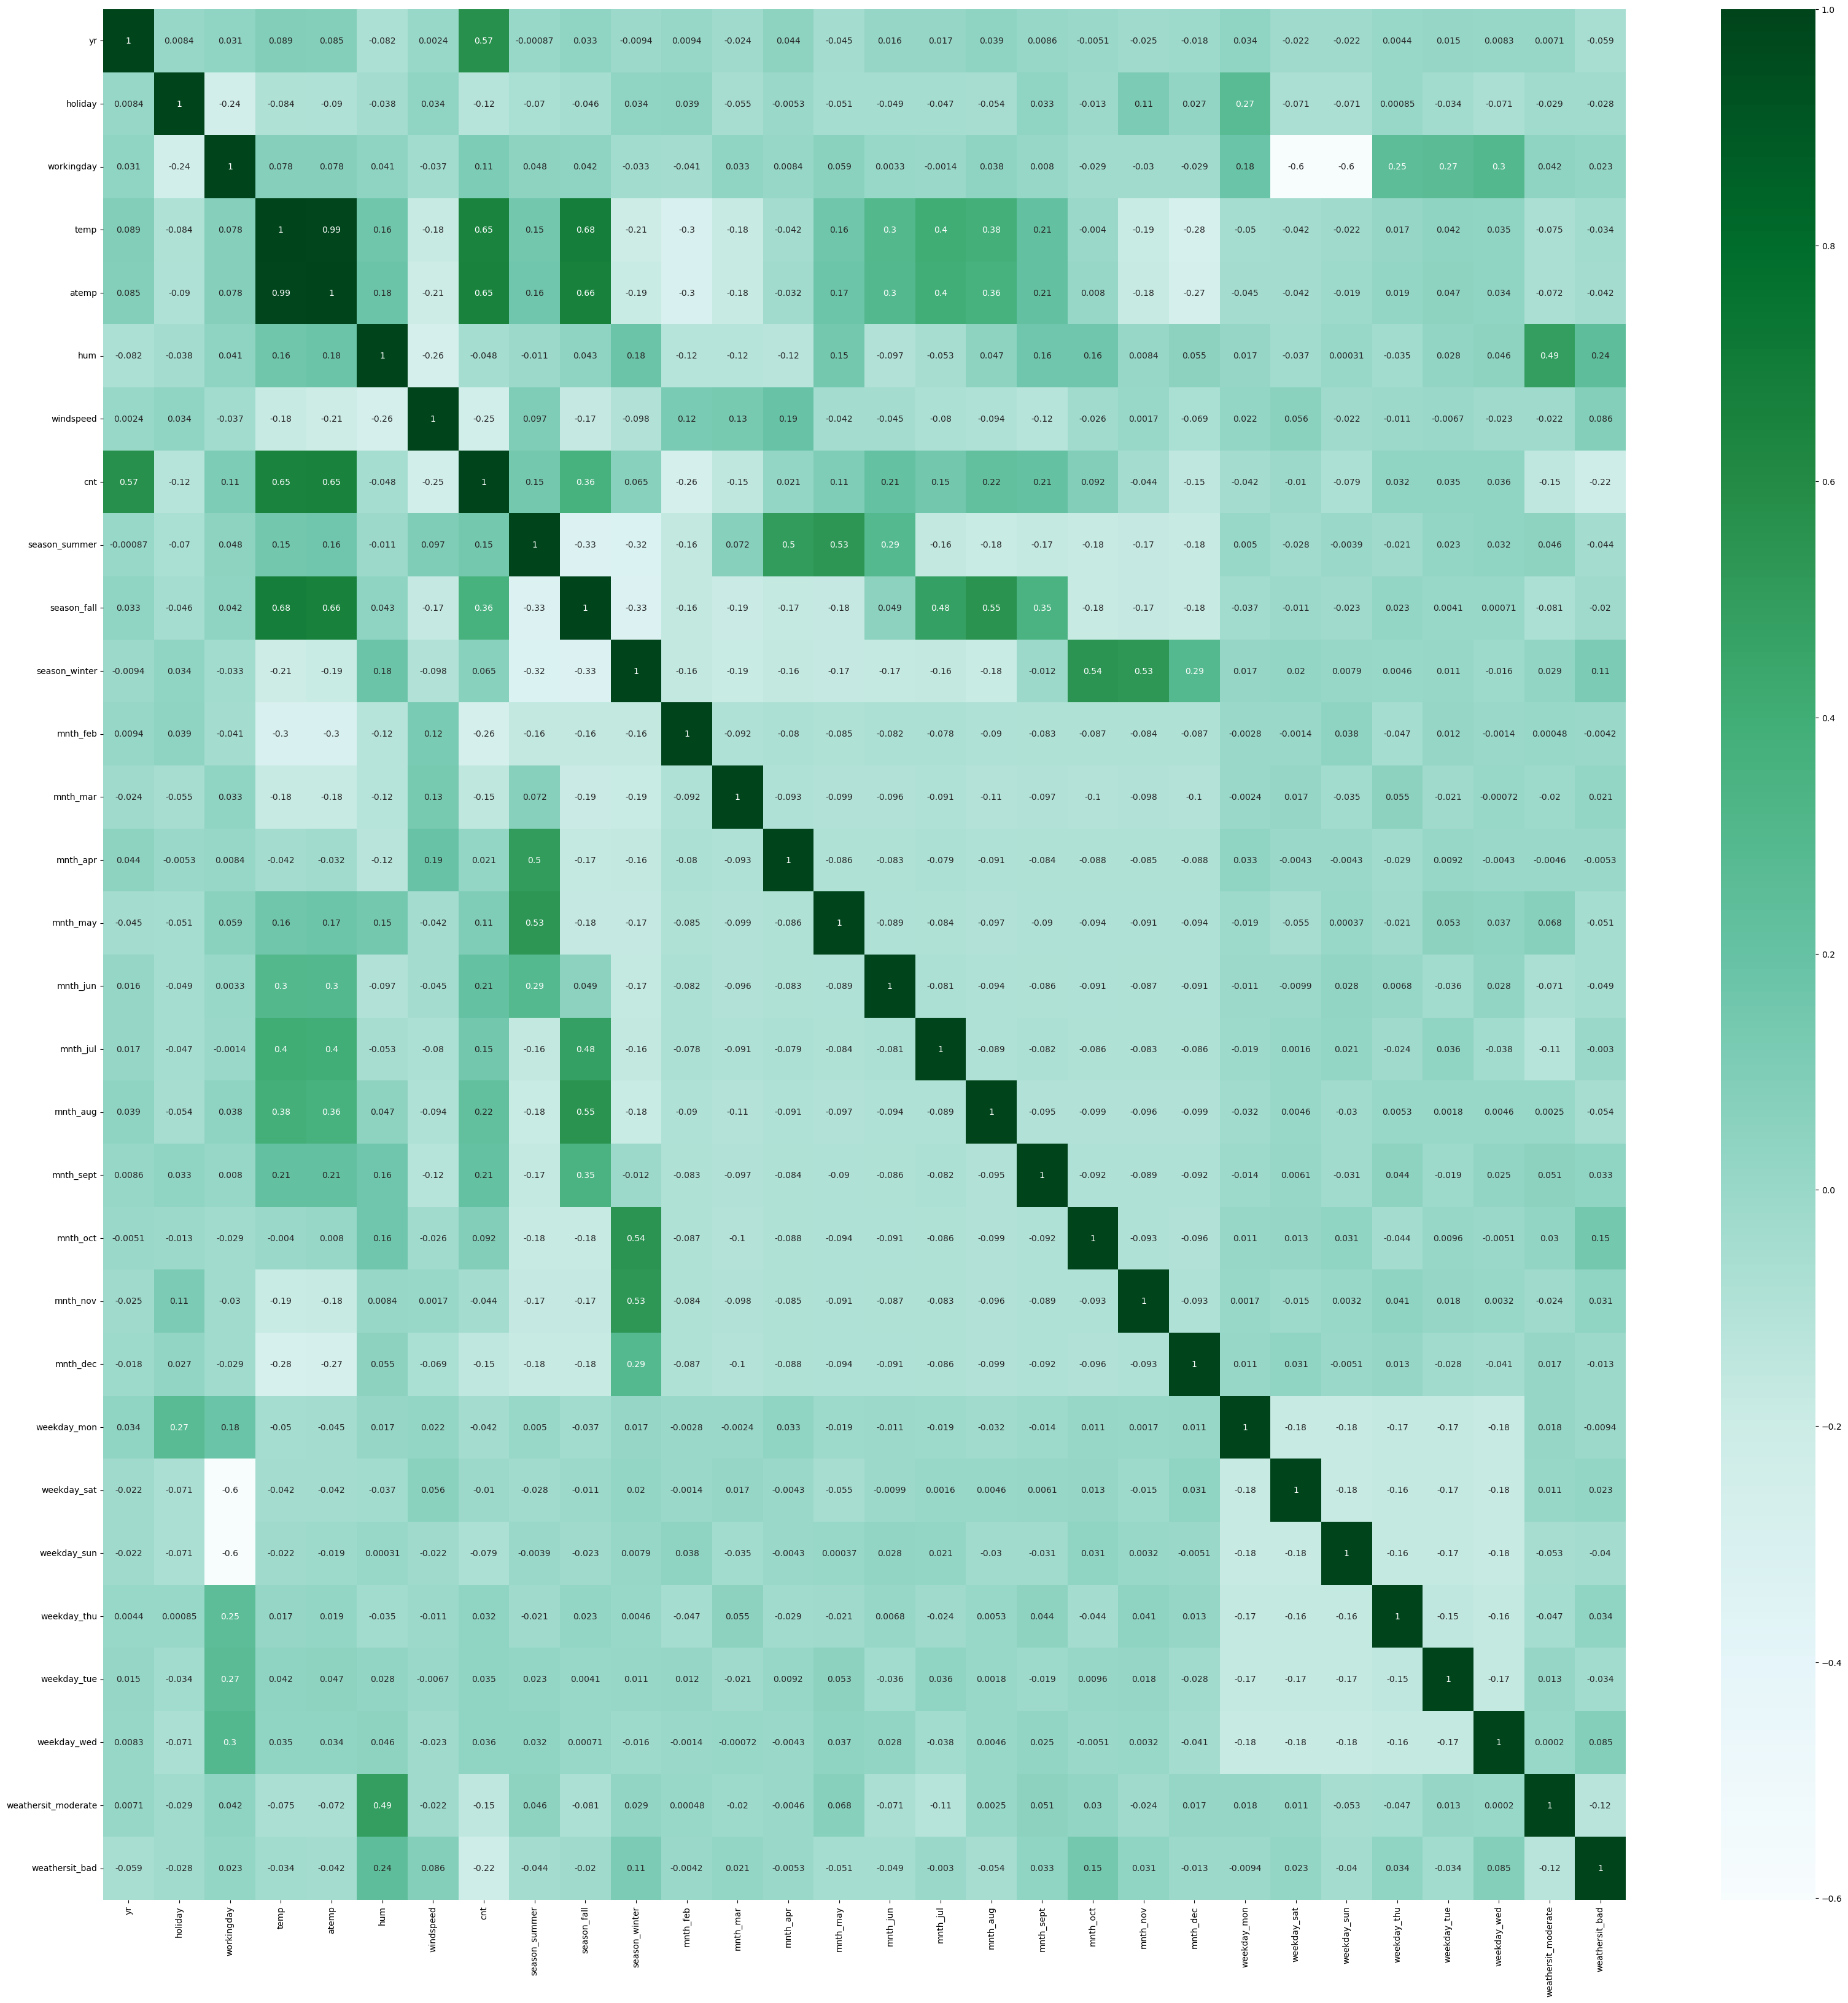

In [235]:
# Plotting a correlation matrix
plt.figure(figsize = (40, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="BuGn")
plt.show()

In [240]:
print(df_train.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mnth_feb', 'mnth_mar',
       'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul', 'mnth_aug', 'mnth_sept',
       'mnth_oct', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate', 'weathersit_bad'],
      dtype='object')


In [259]:
print(df_train.dtypes)

yr                       int64
holiday                  int64
workingday               int64
temp                   float64
atemp                  float64
hum                    float64
windspeed              float64
season_summer             bool
season_fall               bool
season_winter             bool
mnth_feb                  bool
mnth_mar                  bool
mnth_apr                  bool
mnth_may                  bool
mnth_jun                  bool
mnth_jul                  bool
mnth_aug                  bool
mnth_sept                 bool
mnth_oct                  bool
mnth_nov                  bool
mnth_dec                  bool
weekday_mon               bool
weekday_sat               bool
weekday_sun               bool
weekday_thu               bool
weekday_tue               bool
weekday_wed               bool
weathersit_moderate       bool
weathersit_bad            bool
dtype: object


In [247]:
# poping seperating independent and dependent variables
y_train=df_train.pop('cnt')
X_train=df_train

KeyError: 'cnt'

## 4. Build a Model

####  Model #1 

In [248]:
# Building a model with all features using statsmodels :
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr1 = sm.OLS(y_train, X_train_lm).fit()

lr1.params

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
lr1.summary()

In [ ]:
# Here, we can see that all adjusted R-Squire is 0.848 is pretty good.Lets us see if we can reduce the independet features

In [ ]:
# Since number of predictor variables is around 30. It will not be feasible to manually eliminate the insignificance variable.
# Will use hybrid (REF + manual) to elimnate insignifiance variable.

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [249]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)   # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_mar', False, 2),
 ('mnth_apr', False, 5),
 ('mnth_may', False, 3),
 ('mnth_jun', False, 4),
 ('mnth_jul', False, 9),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 14),
 ('mnth_dec', False, 15),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1)]

In [250]:
# RFE support Variables
col = X_train.columns[rfe.support_]
print(len(col))
col

15


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mnth_aug',
       'mnth_sept', 'mnth_oct', 'weekday_sat', 'weathersit_moderate',
       'weathersit_bad'],
      dtype='object')

In [251]:
# RFE not Supported Variables
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [252]:
# Lets consider only  the RFE supported columns for model building 
X_train_rfe = X_train[col]


In [253]:
 #Model#2 

In [254]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [255]:
calculateVIF(X_train_rfe)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Model 2 
#Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

In [256]:
# From abvoe analysis all the variables is having low p-values and also adjusted-R-squire value is 0.847 which is been
# increased from 0.843 to 0.847 after droping 14 features, this means most of the features were insignifiance and few were negative collrelatin
# from above VIP table we can see that workingday is having 31.53 vip value which is quite high. lets remove this featues.


In [257]:
X_train_rfe2 = X_train_rfe.drop(["workingday"], axis = 1)
X_train_rfe2.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_aug,mnth_sept,mnth_oct,weekday_sat,weathersit_moderate,weathersit_bad
311,0,0,0.435124,0.743667,0.057471,False,False,True,False,False,False,False,False,False
523,1,0,0.735215,0.482181,0.286093,True,False,False,False,False,False,False,False,False
381,1,0,0.391151,0.737917,0.659615,False,False,False,False,False,False,False,True,False
413,1,0,0.358285,0.550880,0.319514,False,False,False,False,False,False,True,False,False
253,0,0,0.740406,0.735509,0.156398,False,True,False,False,True,False,False,False,False


In [258]:
calculateVIF(X_train_rfe2)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Model 3 
#Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

In [ ]:
# From above we can see that weekday_sat is having high pValue 0.482>0.05  and hum VIP is 14.57>5.
# Lets drop weekday_sat

In [ ]:
X_train_rfe3 = X_train_rfe2.drop(["weekday_sat"], axis = 1)
X_train_rfe3.head()

In [ ]:

calculateVIF(X_train_rfe3)


In [ ]:
# Model 4
#Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

In [ ]:
# we can see that Adj. R-squire is 0.847 and pvalue is less than 0.05 for every features.
# VIP for hum is 14.57>5.so Lets frist remove the hum.


In [ ]:
X_train_rfe4 = X_train_rfe3.drop(["hum"], axis = 1)
X_train_rfe4.head()

In [ ]:
calculateVIF(X_train_rfe4)

In [ ]:
X_train_lm5 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.summary()

In [ ]:
#From the above  Model Summary Report we can say that all the p-values of respective features are less than 0.05.
# Note: It is a hurestic approach that, if VIF value of any predictor is between 5 & 10, it is recommended to scrutinize such variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10
# So we can now fix this 

### 5. Linear Regrssion Assumptions Proofs
#### Residual Analysis

In [ ]:
# Lets perform Residual Analysis
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train_pred - y_train

In [ ]:
#1. Assumption of Normally Distributed Error Term

# Plot the histogram of the error terms
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show() 


In [ ]:
#Inferences: From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.


In [227]:
#2 Assumption of Error Terms Being Independent

sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

NameError: name 'y_train_pred' is not defined

In [ ]:
#From the above graph, we see that there is almost no relation between Residual & Predicted Value

In [ ]:
# 3. Homoscedasticity

sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

In [ ]:
# we can see that variance is  similar from both end of fitted line.

In [ ]:
# Multicorrelation
calculateVIF(X_train_rfe4)

In [ ]:
plt.figure(figsize = (20, 20))
# Heatmap
sns.heatmap(X_train_rfe4.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# As per above analysis we didn't found multi-colinearity among independedt variables.

### 6. Model Prediction on Test Data

In [ ]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
df_test.head()

In [ ]:
df_test.describe()

In [ ]:
# divie into x and y
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

In [ ]:
X_test=X_test[X_train_rfe4.columns]
# Adding constant variable to test dataframe
X_test_lr5 = sm.add_constant(X_test)
X_test_lr5.info()

In [ ]:
y_test_pred = lr5.predict(X_test_lr5)


In [ ]:
 lr5.params

### 7. Generating R-Square

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

In [ ]:
train_adjuested_r_2=0.841
train_r2=0.844

In [ ]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

test_adjusted_r2 = 1-(1-train_r2)*(n-1)/(n-p-1)
test_adjusted_r2

In [ ]:
# Train R-squire=0.844
# Test R-squire=0.7795
# Train Adj-R-squire=0.841
# Test Adj-R-squire=0.832
# That seems a very good models.